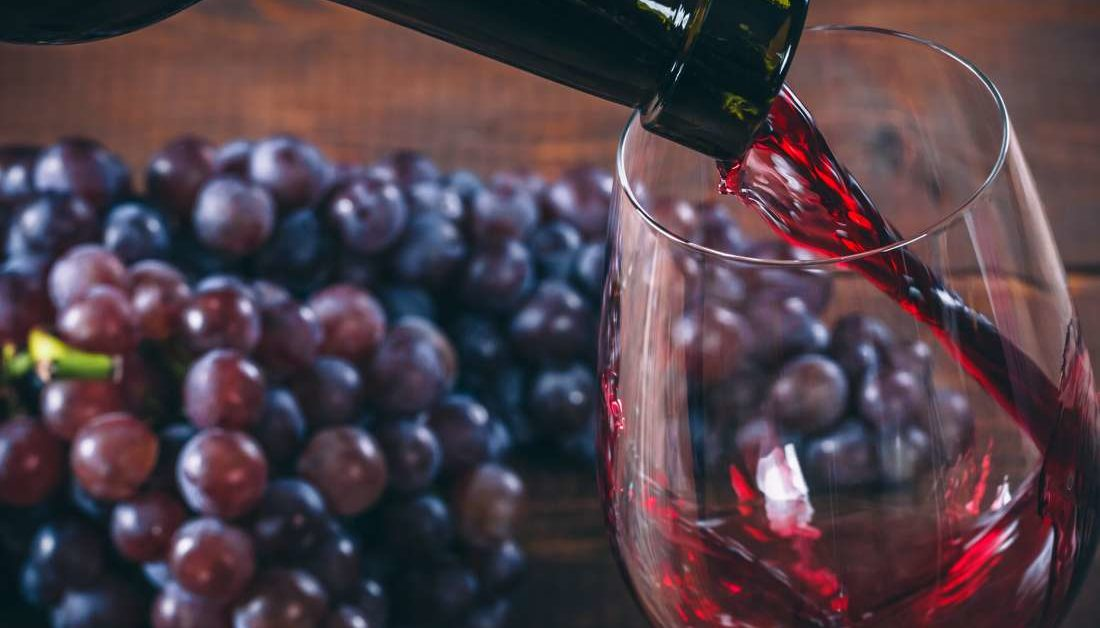

# Libraries

In [ ]:
# for visualization -------------------

import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# for data pipeline --------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import*

# for prediction (machine learning models) ------------------------

from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*
from sklearn import tree

# Data Gathering and Primary Visualizations

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df=pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df

In [ ]:
print('shape of the dataframe is :',df.shape)

In [ ]:
print('Information over the dataframe \n')
print(df.info())

The quality of the dataset should be the predictor column so we are going to treat it a the Y of the data.

As the dataframe does not include any kind of lekagae or any object type data , so we don't have to try any pre-procession to our data.

We will move straight to the EDA portion

# EDA : Exploratory Data Anlaysis

In [ ]:
## check what type of values the 'quality' holds

df['quality'].value_counts()

The data is not balanced well. 

In [ ]:
qual=np.arange(3,9,1)
qual

Now we are going to make a subplot which will show how the quality is depended upon attributes

In [ ]:
k=1
fig,axes=plt.subplots(3,4,figsize=(18, 15))
fig.suptitle('Quality Variation',fontsize=20)
for col in df.columns:
    if col != 'quality':
        arr=[]
        for i in qual:
            xx=df[df['quality']==i]
            arr.append(np.mean(xx[col]))   
        plt.subplot(3,4,k)
        plt.plot(qual,arr,color='yellowgreen')
        plt.title('variation from '+col)
        k+=1
         
plt.show()

    Conclusion :
    
    1. Amount of citric acid, sulphates and alcohol  varies directly with quality with a positive linear gradient.
    2. Amount of fixed acid is needed in a high level , though extremum can lower the quality.
    3. Volatile acidity shows the inverse behaviour of fixed acid.
    4. Amount of chlorides, density of the liquor, pH inversely varies with quality with a negative linear gradient.
    5. Residual sugar, amount of sulphur-di-oxide,free sulphur-di-oxide does not very with the quality in  aregular manner. 
    6. The pH and chloride graph shows similar fashion.
    7. The amount of sulphur and amount of sugar shows opposite orientation.

As there are some similar fashions feature we are going deeper .

#### Volatile Acidity --- Fixed acid Level

In [ ]:
a=np.arange(1,len(df)+1,1)
plt.scatter(a,(df['volatile acidity']-min(df['volatile acidity']))/(max(df['volatile acidity'])-min(df['volatile acidity'])),label='volatile acidity',s=5)
plt.scatter(a,(df['fixed acidity']-min(df['fixed acidity']))/(max(df['fixed acidity'])-min(df['fixed acidity'])),label='fixed acidity',s=5)
plt.legend()
plt.ylabel('scaler')
plt.title('Dependance of volatile acidity upon fixed acidity')
plt.show()

It is pretty obvious that both feature varies inversely .


    Practically ,   
        Let X=Volatile Acidity
            Y=Fixed acidity
            
    So ,  X + Y = constant

#### pH ---- amount of chloride

In [ ]:
plt.scatter(a,(df['chlorides']-min(df['chlorides']))/(max(df['chlorides'])-min(df['chlorides'])),label='amount of chlorides',s=5)
plt.scatter(a,(df['pH']-min(df['pH']))/(max(df['pH'])-min(df['pH'])),label='pH level',s=5)
plt.legend()
plt.title('chlorides and pH')
plt.ylabel('scaler')
plt.show()

If we specificly view the distribuition of pH and chloride level they quite show symmetrical behaviour.

and it is chemically proven.

#### Residual sugar --- Total sulfur

In [ ]:
plt.scatter(a,(df['residual sugar']-min(df['residual sugar']))/(max(df['residual sugar'])-min(df['residual sugar'])),label='amount of residual sufar',s=5)
plt.scatter(a,(df['total sulfur dioxide']-min(df['total sulfur dioxide']))/(max(df['total sulfur dioxide'])-min(df['total sulfur dioxide'])),label='total sulfur dioxide',s=5)
plt.legend()
plt.title('residual sugar and total SO2')
plt.ylabel('scaler')
plt.show()

The inverse relation was seen in a same scale region. But here as he wave enumerous attributes so it is hard to find any relation .

In [ ]:
sugar=(df['residual sugar']-min(df['residual sugar']))/(max(df['residual sugar'])-min(df['residual sugar']))
so2=(df['total sulfur dioxide']-min(df['total sulfur dioxide']))/(max(df['total sulfur dioxide'])-min(df['total sulfur dioxide']))
new_att=np.add(sugar,so2)/2

plt.scatter(a,new_att,color='g')
plt.title('added scatter plot of res sug. and tot SO2')
plt.ylabel('scaler')
plt.show()

This scatterplot shows that the sum of this 2 features is a constant.

As **all the attributes** surely affects the prediction quite a bit, we **cannot** drop any feature but use all.

# Pipelines

## Preparation of data for model fitting and evaluation

        1. Shuffling the data
        2. Creating X and Y
        3. Creating train and test data
        

In [ ]:
dx=df.sample(frac=1)
dx.head()

We are preparing both shuffled and non-shuffled data for prediction as we do not know that the data is pre-shuffled or not.

In [ ]:
X_ns=df.drop('quality',1)
y_ns=df['quality']
X_s=dx.drop('quality',1)
y_s=dx['quality']
print('shape of X :',X_s.shape)
print('shape of Y :',y_s.shape)

As the data is medium in size we are going to make a 80-20 train-test split

In [ ]:
X_train_ns,X_test_ns,y_train_ns,y_test_ns=train_test_split(X_ns,y_ns,test_size=0.2)
X_train_s,X_test_s,y_train_s,y_test_s=train_test_split(X_s,y_s,test_size=0.2)
print('shape of train X : ',X_train_ns.shape)
print('shape of test X : ',X_test_ns.shape)
print('shape of train Y : ',y_train_ns.shape)
print('shape of test Y : ',y_test_ns.shape)

## Model selection-->Fitting-->Evaluation

This is a multiclass classification task.

So, we can use -  
#### 1. Random Forest Classifer
#### 2. Support Vector Machine 
#### 3. K-Neighbour Classifier
#### 4. Decision Tree Classifier

In [ ]:
clf=['RFC','SVM','KNN','DT']
sh_tr=[]
sh_ts=[]
ns_tr=[]
ns_ts=[]

#### Random Forest Classifier

In [ ]:
model=RandomForestClassifier(random_state=0)

In [ ]:
# non-shuffled data

model.fit(X_train_ns,y_train_ns)
print(' accuracy score over non-shuffled train data : ',model.score(X_train_ns,y_train_ns))
print(' model accuracy over non-shuffled test data : ',model.score(X_test_ns,y_test_ns))
ns_tr.append(model.score(X_train_ns,y_train_ns))
ns_ts.append(model.score(X_test_ns,y_test_ns))


# shuffled data

model.fit(X_train_s,y_train_s)
print(' accuracy score over shuffled train data : ',model.score(X_train_s,y_train_s))
print(' model accuracy over shuffled test data : ',model.score(X_test_s,y_test_s))
sh_tr.append(model.score(X_train_s,y_train_s))
sh_ts.append(model.score(X_test_s,y_test_s))

As the classifier shuffles the data , so shuffling before it makes it worse . That's why we are getting low accuracy

#### Support Vector Machine

In [ ]:
model=svm.SVC()

In [ ]:
# non-shuffled data

model.fit(X_train_ns,y_train_ns)
print(' accuracy score over non-shuffled train data : ',model.score(X_train_ns,y_train_ns))
print(' model accuracy over non-shuffled test data : ',model.score(X_test_ns,y_test_ns))
ns_tr.append(model.score(X_train_ns,y_train_ns))
ns_ts.append(model.score(X_test_ns,y_test_ns))


# shuffled data

model.fit(X_train_s,y_train_s)
print(' accuracy score over shuffled train data : ',model.score(X_train_s,y_train_s))
print(' model accuracy over shuffled test data : ',model.score(X_test_s,y_test_s))
sh_tr.append(model.score(X_train_s,y_train_s))
sh_ts.append(model.score(X_test_s,y_test_s))

Surely we can say SVM does not work well in medium sized datasets. That's why it is giving a bad accuracy.

#### K-Neighbours Classifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=6)     # as we have prediction values from 3 to 8

In [ ]:
# non-shuffled data

model.fit(X_train_ns,y_train_ns)
print(' accuracy score over non-shuffled train data : ',model.score(X_train_ns,y_train_ns))
print(' model accuracy over non-shuffled test data : ',model.score(X_test_ns,y_test_ns))
ns_tr.append(model.score(X_train_ns,y_train_ns))
ns_ts.append(model.score(X_test_ns,y_test_ns))


# shuffled data

model.fit(X_train_s,y_train_s)
print(' accuracy score over shuffled train data : ',model.score(X_train_s,y_train_s))
print(' model accuracy over shuffled test data : ',model.score(X_test_s,y_test_s))
sh_tr.append(model.score(X_train_s,y_train_s))
sh_ts.append(model.score(X_test_s,y_test_s))

KNN is also not giving hopeful accuracy : /

In [ ]:
model=tree.DecisionTreeClassifier()

In [ ]:
# non-shuffled data

model.fit(X_train_ns,y_train_ns)
print(' accuracy score over non-shuffled train data : ',model.score(X_train_ns,y_train_ns))
print(' model accuracy over non-shuffled test data : ',model.score(X_test_ns,y_test_ns))
ns_tr.append(model.score(X_train_ns,y_train_ns))
ns_ts.append(model.score(X_test_ns,y_test_ns))


# shuffled data

model.fit(X_train_s,y_train_s)
print(' accuracy score over shuffled train data : ',model.score(X_train_s,y_train_s))
print(' model accuracy over shuffled test data : ',model.score(X_test_s,y_test_s))
sh_tr.append(model.score(X_train_s,y_train_s))
sh_ts.append(model.score(X_test_s,y_test_s))

In [ ]:
# let's check what the decision tree is doing

tree.plot_tree(model)

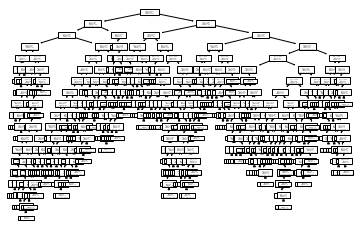

The tree has a complex structure but cannot form a good prediction.

# Model Performances Summary

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(8,6))
fig.suptitle('Accuracy Evaluation',fontsize=20)
plt.subplot(2,2,1)
plt.title('non-shuffled vs. shuffled(Train)')
plt.plot(clf,ns_tr,color='magenta',label='non-shuffled')
plt.plot(clf,sh_tr,color='darkolivegreen',label='shuffled')
plt.legend()
plt.subplot(2,2,2)
plt.title('non-shuffled vs. shuffled(Test)')
plt.plot(clf,ns_ts,color='magenta',label='non-shuffled')
plt.plot(clf,sh_ts,color='darkolivegreen',label='shuffled')
plt.legend()
plt.subplot(2,2,3)
plt.title('train vs. test(non-shuffled)')
plt.plot(clf,ns_tr,color='magenta',label='train data')
plt.plot(clf,ns_ts,color='darkolivegreen',label='test data')
plt.legend()
plt.subplot(2,2,4)
plt.title('train vs. test(shuffled)')
plt.plot(clf,sh_tr,color='magenta',label='train data')
plt.plot(clf,sh_ts,color='darkolivegreen',label='test data')
plt.legend()
plt.show()

This shows us that model accuracies of train and test are changing in a linear manner. 

Whereas the shuffled data is not giving good outputs.

    So, we came to some conclusions:
              1. Model accuracy : RFC > DT > KNN > SVM
              2. data quality : Non-shuffled > Shuffled

# UPVOTE if you like this EDA :)

If there is any query related or not-related to this kernel, you can comment below.
You can see my other works [HERE](https://www.kaggle.com/sagnik1511/notebooks)


### --------------------------------------THANK YOU------------------------------------

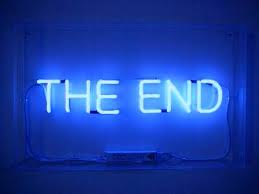